## Building a SVM model for Air Pollution Dataset

Libraries Used:
- matplotlib
- scikit-learn
- pandas
- numpy
- seaborn

## Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


## Importing Dataset

In [2]:
df = pd.read_csv("./datasets/updated_pollution_dataset.csv")

## Data Preprocessing

In [3]:
numerical_cols = df.columns[:-1]  # All columns except the "Air Quality"
df[numerical_cols] = (df[numerical_cols] - df[numerical_cols].mean()) / df[numerical_cols].std()

label_mapping = {
    "Good": 0,
    "Moderate": 1,
    "Poor": 2,
    "Hazardous": 3
}
df['Air Quality'] = df['Air Quality'].map(label_mapping)

df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,-0.034077,-0.690646,-0.608528,-0.450410,-0.844497,-0.120709,0.402262,-0.588600,-1.168046,1
1,-0.257269,0.349472,-0.726633,-0.658826,0.493280,-0.046638,0.255749,-0.671680,0.743523,1
2,-1.031003,0.292739,0.267073,0.130960,-0.226197,0.382972,0.237435,-0.893229,0.795895,1
3,-0.435823,-1.951396,-0.571875,-0.874554,-1.451555,-0.698460,-0.641643,0.740693,0.350735,0
4,-0.525100,0.040589,-0.539295,-0.519882,-0.507242,-0.654018,-0.898040,1.183790,-1.272790,0


## Feature Correlation

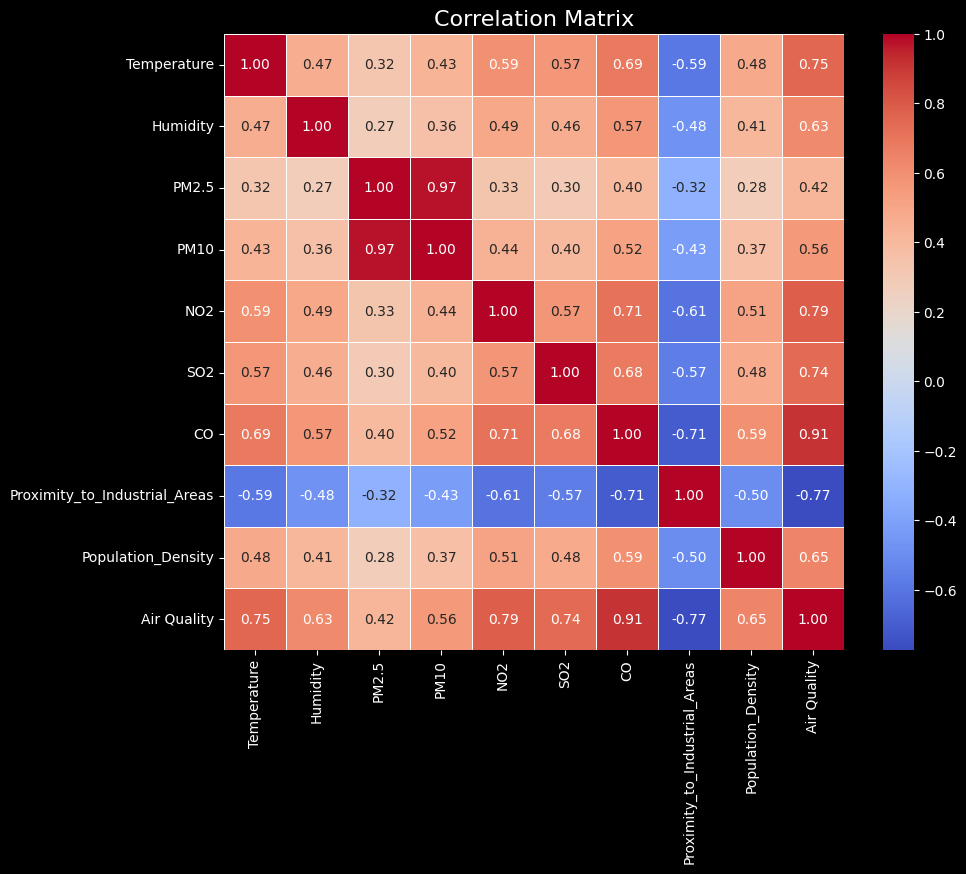

In [7]:
correlation_matrix = df.corr()
plt.style.use('dark_background')
# Plot the heatmap
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Set title
plt.title("Correlation Matrix", fontsize=16)

# Show the plot
plt.show()

## Model Training and Prediction

In [5]:
# Split features (X) and target (y)
X = df.drop(columns=['Air Quality']).values
y = df['Air Quality'].values

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and Train the SVM Model
svm_model = SVC(kernel='rbf', C=1.0, decision_function_shape='ovr', random_state=42)
svm_model.fit(X_train, y_train)

# Make Predictions
y_pred = svm_model.predict(X_test)


## Classification Report and Confusion Matrix

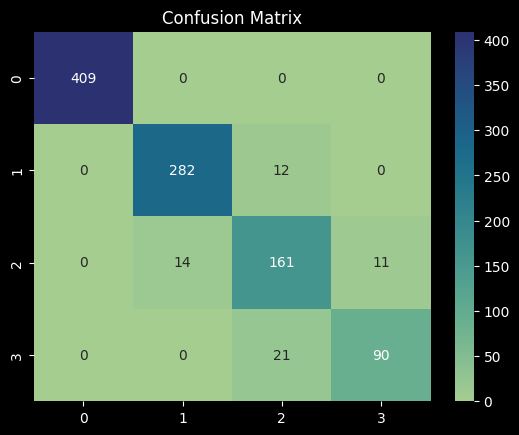

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       409
           1       0.95      0.96      0.96       294
           2       0.83      0.87      0.85       186
           3       0.89      0.81      0.85       111

    accuracy                           0.94      1000
   macro avg       0.92      0.91      0.91      1000
weighted avg       0.94      0.94      0.94      1000

Accuracy: 0.942


In [6]:
plt.style.use('dark_background')
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='crest', fmt='d')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, y_pred, zero_division=0))

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")